<a href="https://colab.research.google.com/github/Jayanavya/PersonalMedicalCost_Prediction_Project/blob/main/Medical_Cost_Prediction_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
path = '/content/drive/MyDrive/Datasets/PersonalMedicalCostPrediction/insurance.csv'
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Exploratory Data Analysis**

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


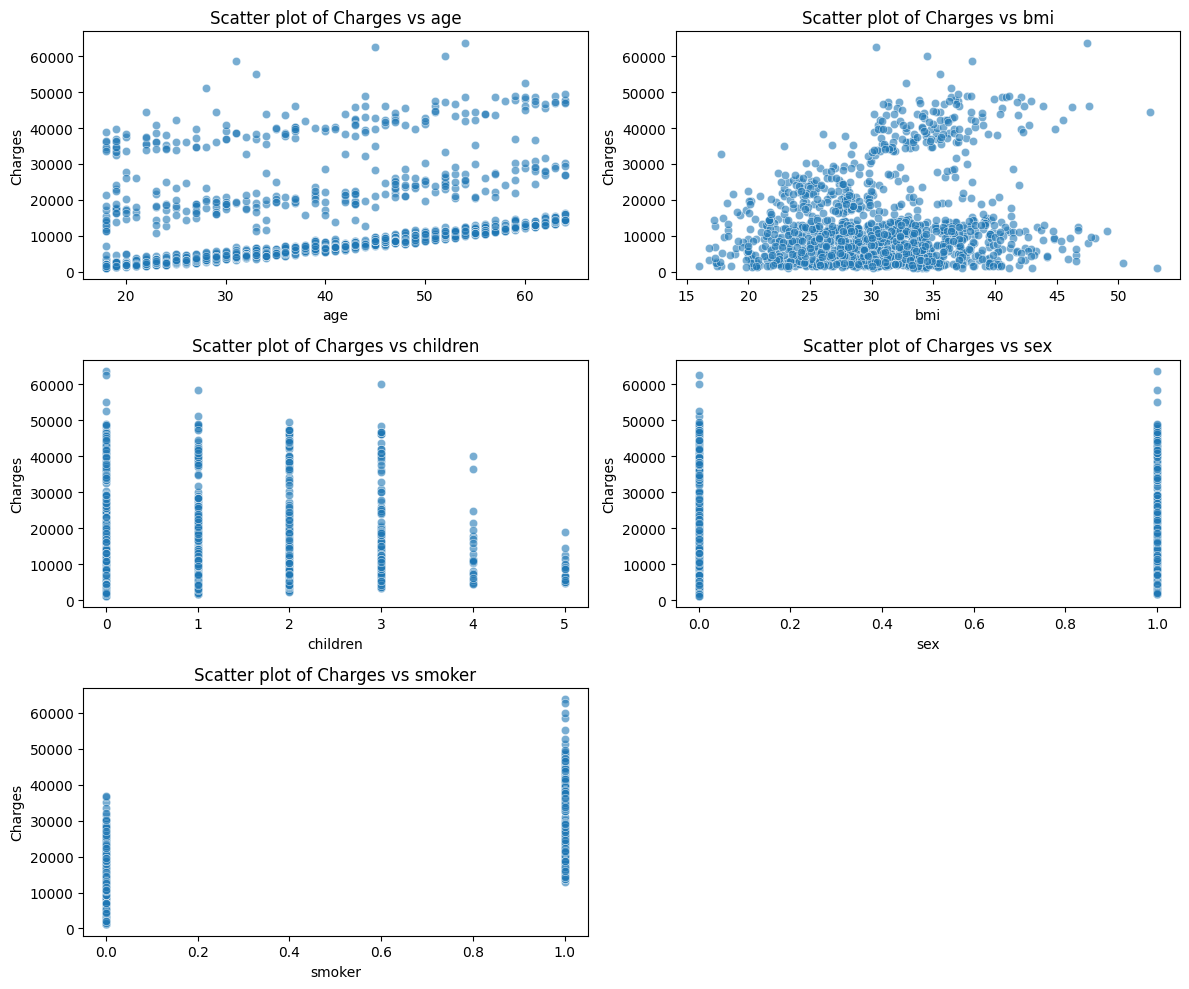

In [ ]:
# Convert categorical data to numerical for plotting
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Create scatter plots between 'charges' and each numerical feature
numerical_features = ['age', 'bmi', 'children', 'sex', 'smoker']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='charges', alpha=0.6)
    plt.title(f'Scatter plot of Charges vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')

plt.tight_layout()
plt.show()

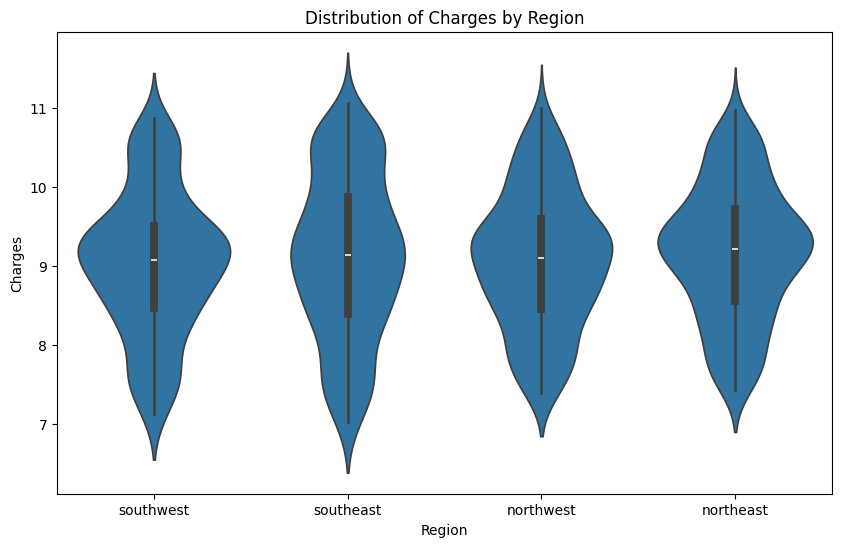

In [ ]:
# Adding a column for log-transformed charges
df['log_charges'] = np.log(df['charges'])

# Violin plot for charges by region
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='region', y='log_charges')
plt.title('Distribution of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

Region wise, we can not see much difference in the distribution of the charges, we can see that there are more people in southeast region having higher medical cost, this might be helpful, but more or less these are having same distribution.

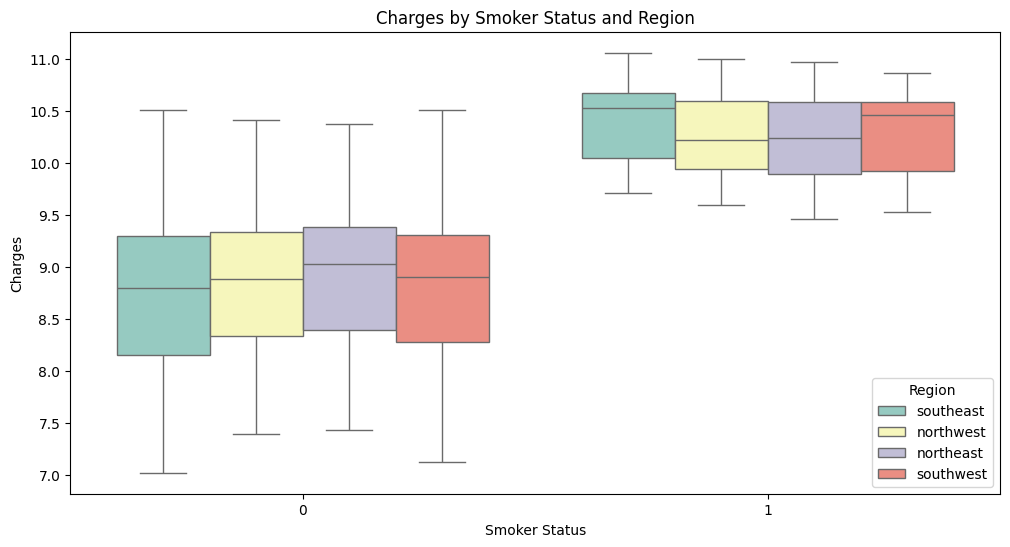

In [ ]:
# Box plot for charges by smoker status and region
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='log_charges', hue='region', data=df, palette="Set3")
plt.title('Charges by Smoker Status and Region')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.legend(title='Region')
plt.show()

Smokers incur higher medical charges than non-smokers across all regions.

Regional Differences: Smokers in the southeast region tend to have higher charges compared to other regions.

Non-smokers show more consistent, lower charges across regions.

Let's do some clustering in the BMI and Age scatter plots, it might give us some insights.

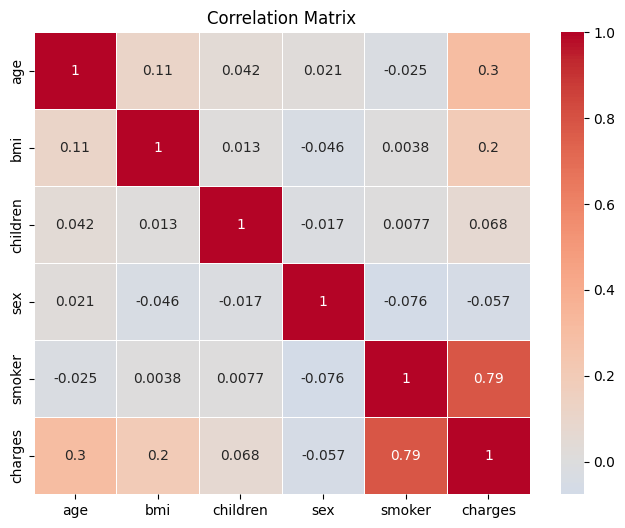

In [ ]:
corr_matrix = df[['age', 'bmi', 'children', 'sex', 'smoker', 'charges']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see a strong correlation between the Smokers and charges, which means smoking status is very much related to higher charges, which is quite obvious.

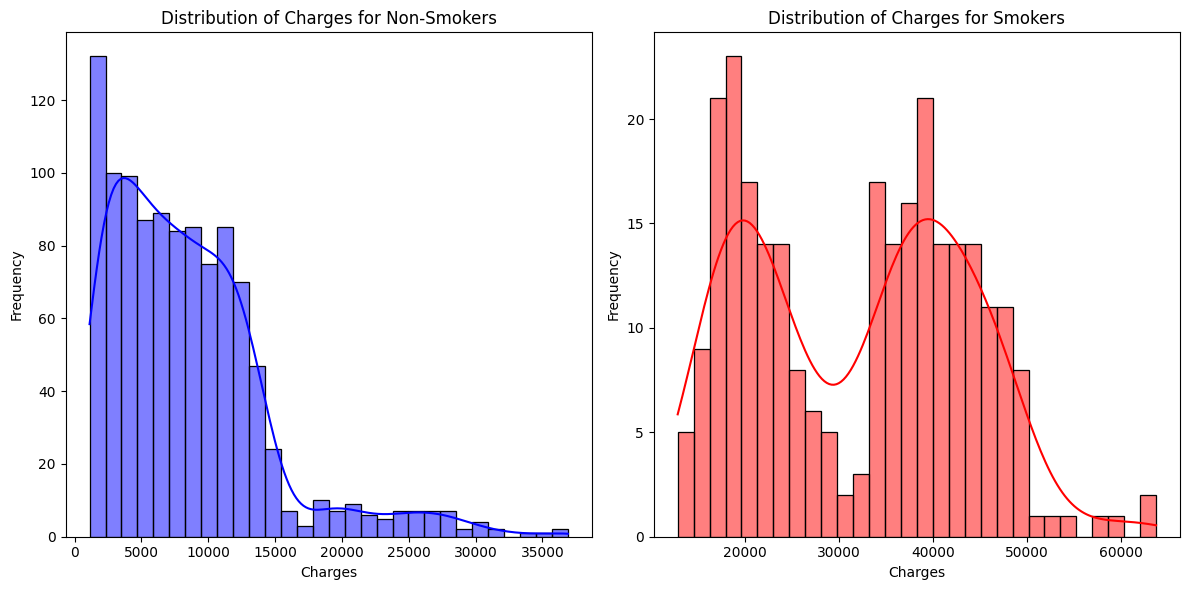

In [ ]:
# Create distribution plots for charges of smokers and non-smokers in separate subplots
plt.figure(figsize=(12, 6))

# Subplot for non-smokers
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['smoker'] == 0], x='charges', kde=True, color='blue', bins=30)
plt.title('Distribution of Charges for Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Subplot for smokers
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['smoker'] == 1], x='charges', kde=True, color='red', bins=30)
plt.title('Distribution of Charges for Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **Comparative Analysis of Smokers vs. Non-Smokers**

In [ ]:
from scipy import stats

# Split data into smokers and non-smokers
smokers = df[df['smoker'] == 1]
non_smokers = df[df['smoker'] == 0]

# Calculate summary statistics for log-transformed charges
smokers_stats = {
    "mean_log_charges": smokers['log_charges'].mean(),
    "median_log_charges": smokers['log_charges'].median(),
    "count": smokers['log_charges'].count()
}

non_smokers_stats = {
    "mean_log_charges": non_smokers['log_charges'].mean(),
    "median_log_charges": non_smokers['log_charges'].median(),
    "count": non_smokers['log_charges'].count()
}

# Perform a t-test to determine if the difference in log-transformed charges is statistically significant
t_stat, p_value = stats.ttest_ind(smokers['log_charges'], non_smokers['log_charges'], equal_var=False)

# Print the results
print("Smokers Stats:", smokers_stats)
print("Non-Smokers Stats:", non_smokers_stats)
print("T-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Smokers Stats: {'mean_log_charges': 10.304109568020342, 'median_log_charges': 10.447448425027234, 'count': 274}
Non-Smokers Stats: {'mean_log_charges': 8.78823247963606, 'median_log_charges': 8.901830266523756, 'count': 1064}
T-test Results:
T-statistic: 46.37084368606731
P-value: 3.9165953769040334e-234


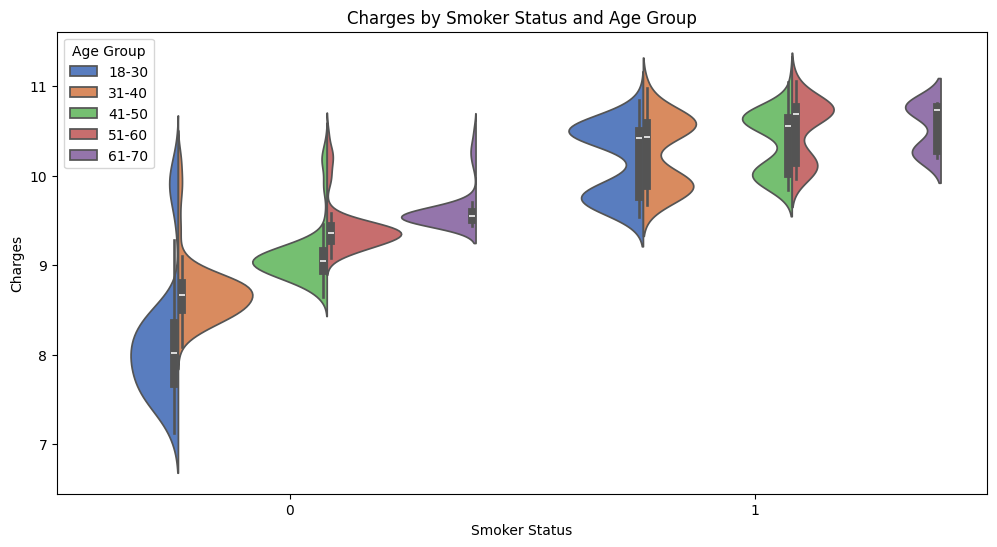

In [ ]:
# Creating age groups for the violin plot
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])

# Violin plot for charges by smoker status and age group
plt.figure(figsize=(12, 6))
sns.violinplot(x='smoker', y='log_charges', hue='age_group', data=df, split=True, palette="muted")
plt.title('Charges by Smoker Status and Age Group')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.legend(title='Age Group')
plt.show()

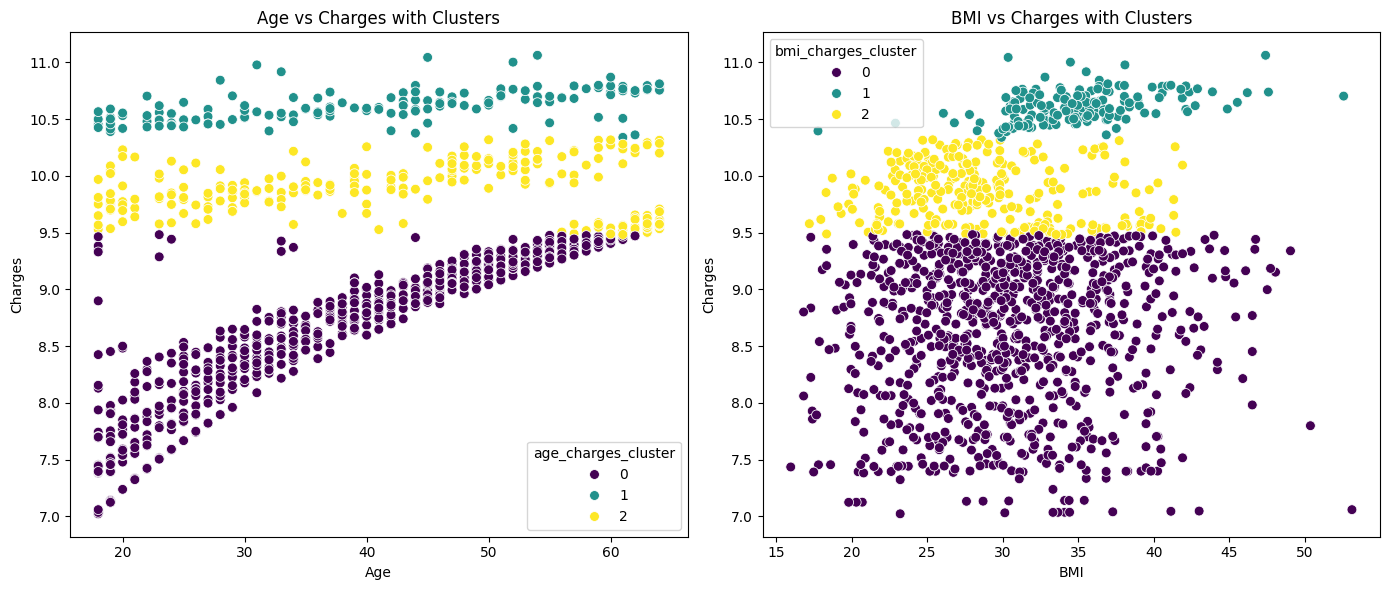

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

# Define the data for clustering: Age vs Charges and BMI vs Charges
age_charges_data = df[['age', 'charges']]
bmi_charges_data = df[['bmi', 'charges']]

# Apply KMeans clustering with an arbitrary choice of 3 clusters
kmeans_age_charges = KMeans(n_clusters=3, random_state=42).fit(age_charges_data)
kmeans_bmi_charges = KMeans(n_clusters=3, random_state=42).fit(bmi_charges_data)

# Add the cluster labels to the data for plotting
df['age_charges_cluster'] = kmeans_age_charges.labels_
df['bmi_charges_cluster'] = kmeans_bmi_charges.labels_

# Set up the plot grid for scatter plots with clusters
plt.figure(figsize=(14, 6))

# Age vs Charges with clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='log_charges', hue='age_charges_cluster', palette='viridis', s=50)
plt.title('Age vs Charges with Clusters')
plt.xlabel('Age')
plt.ylabel('Charges')

# BMI vs Charges with clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bmi', y='log_charges', hue='bmi_charges_cluster', palette='viridis', s=50)
plt.title('BMI vs Charges with Clusters')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

### **Impact of Age and BMI on Charges**

<Figure size 1200x600 with 0 Axes>

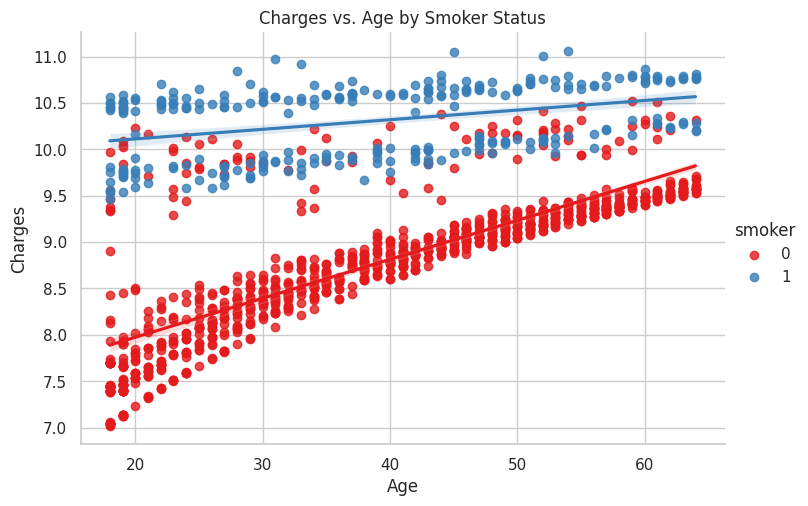

In [ ]:
# Set up the visual style for seaborn
sns.set(style="whitegrid")

# Plot regression lines for charges vs. age, color-coded by smoker status
plt.figure(figsize=(12, 6))
sns.lmplot(x='age', y='log_charges', hue='smoker', data=df, aspect=1.5, palette="Set1")
plt.title('Charges vs. Age by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

<Figure size 1200x600 with 0 Axes>

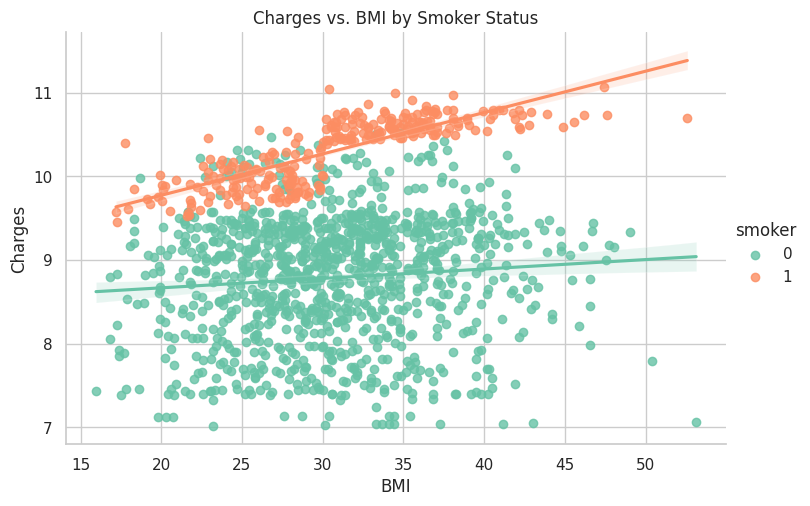

In [ ]:
# Plot regression lines for charges vs. BMI, color-coded by smoker status
plt.figure(figsize=(12, 6))
sns.lmplot(x='bmi', y='log_charges', hue='smoker', data=df, aspect=1.5, palette="Set2")
plt.title('Charges vs. BMI by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

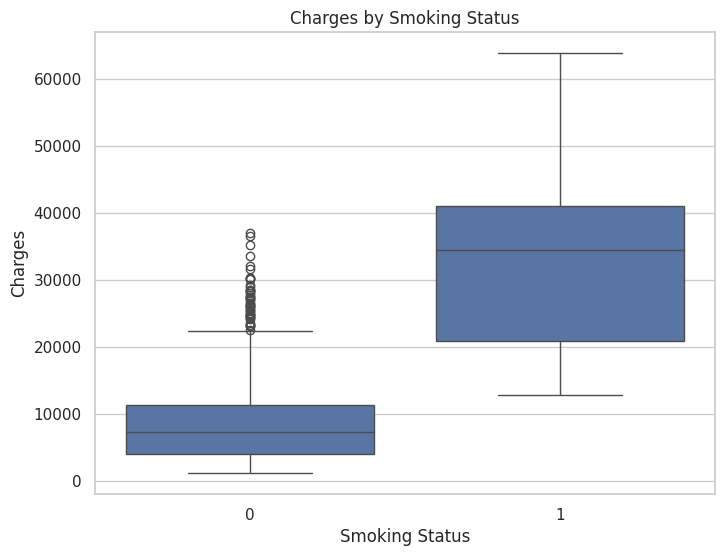

In [ ]:
# Plot the boxplot for smoker status vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()

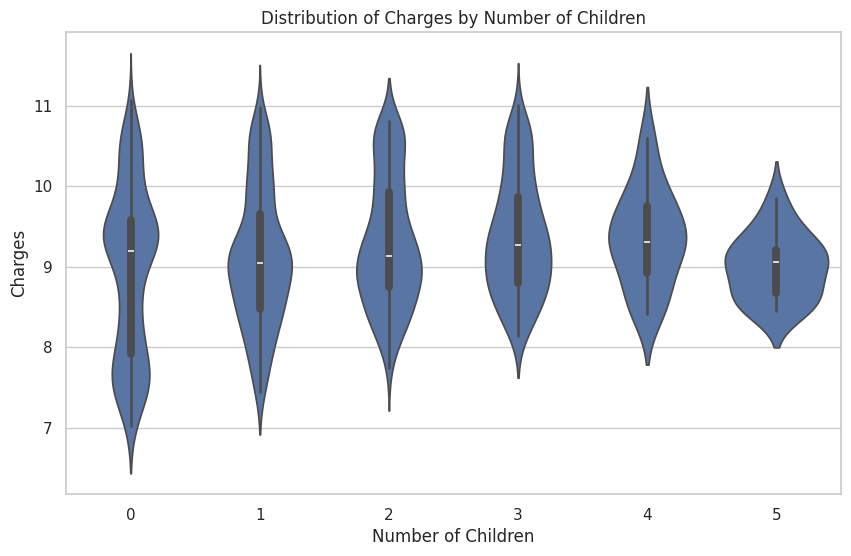

In [ ]:
# Violin plot for charges by number of children
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='children', y='log_charges')
plt.title('Distribution of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

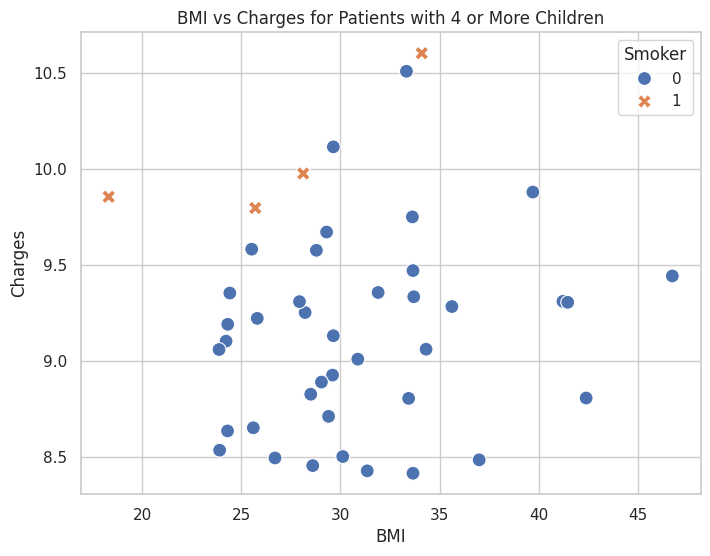

In [ ]:
# Filter data for patients with 4 or more children
large_families_data = df[df['children'] >= 4]

# Scatter plot of BMI vs Charges for patients with 4 or more children
plt.figure(figsize=(8, 6))
sns.scatterplot(data=large_families_data, x='bmi', y='log_charges', hue='smoker', style='smoker', s=100)
plt.title('BMI vs Charges for Patients with 4 or More Children')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.get_dummies(df, columns=['region'], drop_first=True)  # One-hot encoding for region

# Create a mapping for better readability in legends
sex_mapping = {0: 'Male', 1: 'Female'}
smoker_mapping = {0: 'Non-Smoker', 1: 'Smoker'}

df['sex_label'] = df['sex'].map(sex_mapping)
df['smoker_label'] = df['smoker'].map(smoker_mapping)

# Features for the scatter plot
fig = px.scatter_3d(
    df,
    x='age',  # X-axis
    y='bmi',  # Y-axis
    z='charges',  # Z-axis
    color='smoker_label',  # Different colors for smokers and non-smokers
    symbol='sex_label',  # Different symbols for male and female
    size='children',  # Size of points according to the number of children
    labels={
        'age': 'Age',
        'bmi': 'BMI',
        'charges': 'Charges',
        'smoker_label': 'Smoking Status',
        'sex_label': 'Sex',
        'children': 'Number of Children'
    },
    title='3D Scatter Plot of Medical Charges with Age, BMI, and Smoking Status'
)

# Update layout to arrange the legend
fig.update_layout(
    legend=dict(
        title='Legend',
        itemsizing='constant',  # Keeps the size of legend items consistent
        font=dict(size=12),
        orientation="v",  # Display legends vertically
        x=1.05,  # Position the legend outside of the plot for clarity
        y=1,  # Aligns the legend at the top right corner
        bgcolor='rgba(255, 255, 255, 0.8)',  # Adds a white background for better readability
        bordercolor='black',
        borderwidth=1
    ),
    scene=dict(
        xaxis_title='Age',
        yaxis_title='BMI',
        zaxis_title='Charges'
    )
)

# Show the interactive plot
fig.show()


## **Feature Importance**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Convert smoker to binary for regression analysis
df['smoker_binary'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Create interaction terms (age * smoker, BMI * smoker)
df['age_smoker'] = df['age'] * df['smoker_binary']
df['bmi_smoker'] = df['bmi'] * df['smoker_binary']

# Select relevant features and target variable
X = df[['age', 'bmi', 'children', 'smoker_binary', 'age_smoker', 'bmi_smoker']]
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on test data
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importance (coefficients for linear regression)
feature_importance = dict(zip(X.columns, linear_model.coef_))

# Print results
print("MSE:", mse)
print("R2 Score:", r2)
print("Feature Importance:", feature_importance)

MSE: 131201335.64669806
R2 Score: 0.15489592484270753
Feature Importance: {'age': 220.7577654082284, 'bmi': 332.2024758448381, 'children': 563.0194324178054, 'smoker_binary': 0.0, 'age_smoker': 0.0, 'bmi_smoker': 0.0}
